# Project 1 Boston Housing<br>
***
This file contains the exploration, preprocessing and predictions on the boston_housing dataset. The dataset holds 506 instances and 13 features. Our target is to use these features to find the median value of homes.
***
Features:
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built before 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: lower status of the population
***

Targets:
1. MEDV: Median value of owner-occupied homes in $1000's
***

### Imports

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
import xgboost
import joblib
sns.set()

### Load in the data

In [2]:
# sklearn's toy dataset.
boston_housing = datasets.load_boston()
boston_housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
boston_housing.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

### Turning the data into a dataframe and defining X and y

In [4]:
column_names = list(boston_housing.feature_names)
# Column names to be used for the pandas dataframe.
X = pd.DataFrame(data=boston_housing.data, columns=column_names)
y = pd.DataFrame(data=boston_housing.target, columns=["MEDV"])
# Converted the numpy data into a pandas dataframe for greater visulaisation and preprocessing.

In [5]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Visulaise and preproces

In [6]:
# Check that there is no missing data.
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


We can confirm that there are 506 non-null values for all features. **No missing data**

In [7]:
X["CHAS"] = X["CHAS"].astype('bool')
# CHAS is a bool type therefore we will make the CHAS attribute as type bool, when we automatically look for values to scale we will not include the bool type.

In [8]:
X.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
features_skew = X.select_dtypes(include=[np.number]).skew()
# Many features of our data are skewed and the outliers will negativly effect our final model.
features_skew

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
dtype: float64

CRIM, ZN, NOX, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT are all skewded features determined by the skewed value being >0.5.<br> We can demonstrate this visually.<br>

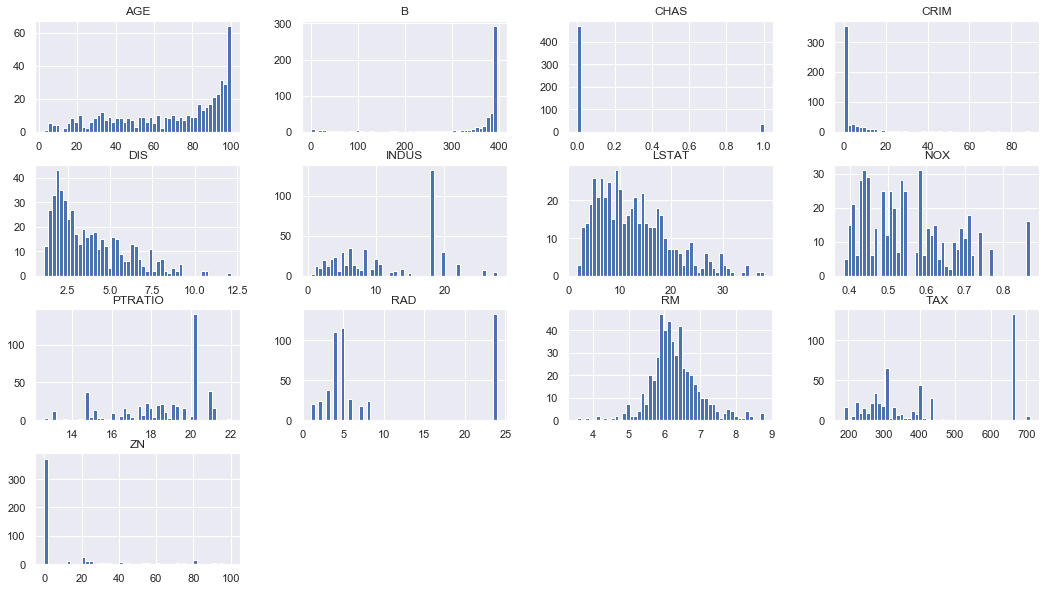

In [10]:
X.astype('float64').hist(bins=50, figsize=(18,10))
# All features must be floats because bool is not supported.
plt.show()

In [11]:
skewed_features = list(features_skew[abs(features_skew) > 0.5].index)
# The features that we will apply a log transformation and power scaling to.
scale_features = list([name for name in features_skew.index if name not in skewed_features])
# The features that will be simply scaled.
boolean_features = list(X.select_dtypes(exclude=[np.number]).columns)
# The earlier defined bool feature (no methods will be applied).

In [12]:
skewed_features

['CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [13]:
scale_features

['INDUS', 'RM']

In [14]:
boolean_features

['CHAS']

I used log transformation and powers to discover that the features age, b and pratio were still skewed. The features were less skewed when we didn't apply log or power transformations.

In [15]:
skewed_features = ['CRIM', 'ZN', 'NOX', 'DIS', 'RAD', 'TAX', 'LSTAT']
scale_features = ['INDUS', 'RM', 'AGE', 'PTRATIO', 'B']

We need to make a log function so that we can reduce the skew of this data, but there is no log transformer or power transformer, so we use FunctionTransformer.

Change the order of the X data so that the processor can pass the features correctly.

In [16]:
feature_names = ['INDUS', 'RM', 'AGE', 'PTRATIO', 'B', 'CRIM', 'ZN', 'NOX', 'DIS', 'RAD', 'TAX', 'LSTAT', 'CHAS']
X = X[feature_names]

In [17]:
def skewedpower(data):
    return data**0.085
# Defined my function to scale the data by 0.085. This value was chosen because it achieved the best overall skewness.

In [18]:
reduce_skew_pipeline = Pipeline([('log', FunctionTransformer(np.log1p, validate=False)), 
                                 ('power', FunctionTransformer(skewedpower))
                                 ])
# Used a pipeline to apply two different transformations to the same features.

In [19]:
preprocessor = ColumnTransformer(transformers=[
        ('scale', StandardScaler(), scale_features),
        ('skew', reduce_skew_pipeline, skewed_features)
         ], remainder='passthrough')
# Using log1p so we don't have to worry about having to log 0.
# Also scaling the data by 0.085 to normalise the skewed data.

In [20]:
X_scaled = preprocessor.fit_transform(X)
# Fitting and transforming the data into a scaled version. We can use this preprocessor again if we need it.

In [21]:
X_scaled = pd.DataFrame(data=X_scaled, columns=feature_names)
# Making the data a pandas dataframe for further analysis.

We now check how skewed the data is again, comparing the old X features to the new X_scaled features.

In [22]:
X.select_dtypes(include=[np.number]).skew()

INDUS      0.295022
RM         0.403612
AGE       -0.598963
PTRATIO   -0.802325
B         -2.890374
CRIM       5.223149
ZN         2.225666
NOX        0.729308
DIS        1.011781
RAD        1.004815
TAX        0.669956
LSTAT      0.906460
dtype: float64

In [23]:
X_scaled.select_dtypes(include=[np.number]).skew()

INDUS      0.295022
RM         0.403612
AGE       -0.598963
PTRATIO   -0.802325
B         -2.890374
CRIM       0.176370
ZN         1.070107
NOX        0.323150
DIS       -0.040915
RAD       -0.223844
TAX        0.263190
LSTAT     -0.667883
CHAS       3.405904
dtype: float64

A much better overall skewness. Age, B and PRATIO are still skewed. A final visual representation:

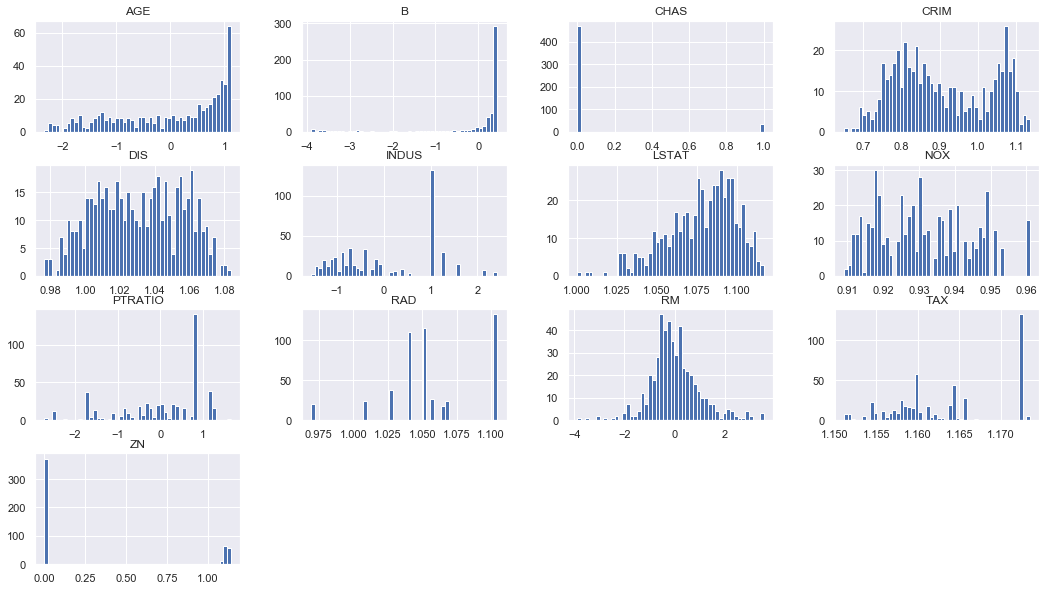

In [24]:
import matplotlib.pyplot as plt
X_scaled.hist(bins=50, figsize=(18,10))
plt.show()

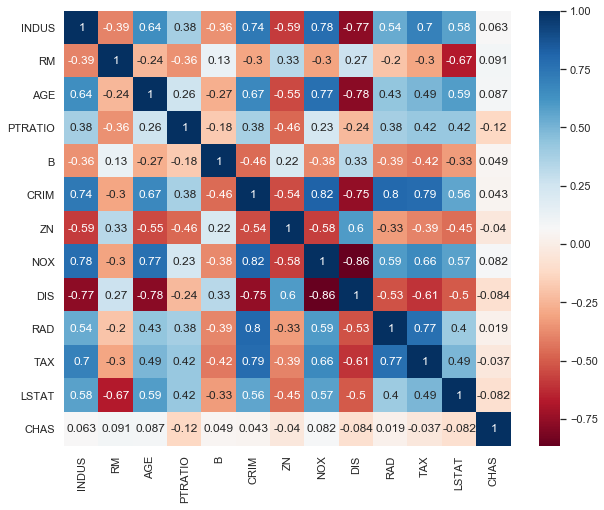

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_scaled.corr(), cmap='RdBu', annot=True)
# Check how features correlate with each other, high correlation is non-preferable for the model.

## Splitting the data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values.ravel(), test_size=0.5, random_state=42)
# Splitting the data evenly becuase of the lack of instances.
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
# Again splitting the data into a 50% training, 25% test and 25% validation.

## Model Selection

In [27]:
random_reg = RandomForestRegressor(random_state=42)
lin_reg = LinearRegression()
elastic_reg = ElasticNet(random_state=42)
lass_reg = Lasso(random_state=42)
svr = SVR()
lin_srv = LinearSVR(random_state=42)
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1), n_estimators=200, learning_rate=0.5)
xgb_reg = xgboost.XGBRegressor()
extra_tree_reg = ExtraTreesRegressor()
# Defining regression models to be trained.

In [28]:
for reg in (random_reg, lin_reg, elastic_reg, lass_reg, svr, lin_srv, ada_reg, xgb_reg, extra_tree_reg):
    reg.fit(X_train, y_train)
    # Run through each model and fit them to the training data.
    scores = cross_val_score(reg, X_train, y_train, scoring="neg_mean_squared_error", cv=5);
    # Find the scores of the nmse with cv=5 because we have a small amount of data.
    sqrt_scores = np.sqrt(-scores)
    mean_score = sqrt_scores.mean()
    print(reg.__class__.__name__, mean_score)

RandomForestRegressor 3.8804400163622907
LinearRegression 4.273841476202565
ElasticNet 6.104622851025142
Lasso 5.833653859138552
SVR 5.905485284556716
LinearSVR 5.599578086246889
AdaBoostRegressor 5.994445471459295
XGBRegressor 4.066196622779617
ExtraTreesRegressor 3.4241587913753575


In [29]:
# Because our data has been split from the X_scaled version we can look at the R^2 scores.
for reg in (random_reg, lin_reg, elastic_reg, lass_reg, svr, lin_srv, ada_reg, xgb_reg, extra_tree_reg):
    train_score = reg.score(X_train, y_train)
    test_score = reg.score(X_test, y_test)
    # Scores for the training data and the test data. The larger the gap the more likely we have overfit our data.
    print(reg.__class__.__name__, train_score, test_score)

RandomForestRegressor 0.97490695196381 0.8499969150633414
LinearRegression 0.812983060654409 0.8212452127076986
ElasticNet 0.5840828710105674 0.6446332664986998
Lasso 0.6221827352131322 0.6729218653831419
SVR 0.6534708950313082 0.68289049959146
LinearSVR 0.6507078264315929 0.6871119607392031
AdaBoostRegressor 0.6568731365117653 0.6731937707314462
XGBRegressor 0.9999997643738315 0.8788273762552107
ExtraTreesRegressor 1.0 0.9200200099324103


## ExtraTreeRegressor. This model was the most consistent as the best performer

In [31]:
param_grid = [
    {'max_depth': [10, 20, 30, 40, 50, 60],
     'min_samples_leaf': [1, 2],
     'min_samples_split': [2],
     'max_features':[0.3, 0.4, 0.5, 0.6]}
    ]
grid_search = GridSearchCV(extra_tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] max_depth=10, max_features=0.3, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=10, max_features=0.3, min_samples_leaf=1, min_samples_split=2, score=(train=-1.088, test=-13.697), total=   0.1s
[CV] max_depth=10, max_features=0.3, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=10, max_features=0.3, min_samples_leaf=1, min_samples_split=2, score=(train=-1.001, test=-17.520), total=   0.2s
[CV] max_depth=10, max_features=0.3, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=10, max_features=0.3, min_samples_leaf=1, min_samples_split=2, score=(train=-0.927, test=-11.925), total=   0.1s
[CV] max_depth=10, max_features=0.3, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=10, max_features=0.3, min_samples_leaf=1, min_samples_split=2, score=(train=-0.935, test=-16.973), total=   0.1s
[CV] max_depth=10, max_features=0.3, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=10, max_features=0.3, min_samples_leaf=1, min_samples_split=2, score=(train=-1.189, test=-20.158), total=   0.1s
[CV] max_depth=10, max_features=0.3, min_samples_leaf=2, min_samples_split=2 
[CV]  max_depth=10, max_features=0.3, min_samples_leaf=2, min_samples_split=2, score=(train=-6.522, test=-18.242), total=   0.1s
[CV] max_depth=10, max_features=0.3, min_samples_leaf=2, min_samples_split=2 
[CV]  max_depth=10, max_features=0.3, min_samples_leaf=2, min_samples_split=2, score=(train=-6.966, test=-21.788), total=   0.1s
[CV] max_depth=10, max_features=0.3, min_samples_leaf=2, min_samples_split=2 
[CV]  max_depth=10, max_features=0.3, min_samples_leaf=2, min_samples_split=2, score=(train=-6.986, test=-17.163), total=   0.1s
[CV] max_depth=10, max_features=0.3, min_sa

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   31.5s finished


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid=[{'max_depth': [10, 20, 30, 40, 50, 60],
                          'max_features': [0.3, 0.4, 0.5, 0.6],
                          'min_samples_leaf': [1, 2],
                          'min_samples_split': [2]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [32]:
np.sqrt(abs(grid_search.best_score_))

3.4156605892938052

In [33]:
grid_search.best_estimator_

ExtraTreesRegressor(max_depth=40, max_features=0.6)

### Through the above grid search we found the best values for this model. ExtraTree_reg = ExtraTreesRegressor(max_depth=50, max_features=0.4, n_estimators=1000)

In [34]:
feature_importance=grid_search.best_estimator_.feature_importances_
sorted(zip(feature_importance, feature_names), reverse=True)
# We check to see if any features need to be dropped.

[(0.29917850419785785, 'LSTAT'),
 (0.2869881928209201, 'RM'),
 (0.053563722374120236, 'INDUS'),
 (0.05294733195838403, 'PTRATIO'),
 (0.05288821831924432, 'TAX'),
 (0.044056378659972764, 'DIS'),
 (0.03982636966802331, 'CRIM'),
 (0.0344742539667127, 'NOX'),
 (0.0328765997983934, 'CHAS'),
 (0.03144669232914263, 'ZN'),
 (0.027152527903508226, 'B'),
 (0.02327526100890509, 'AGE'),
 (0.021325946994815347, 'RAD')]

The most important features seemed to be LSTAT (satus of area) and RM (rooms). No need to drop any features

In [35]:
final_model = grid_search.best_estimator_ 
# We set our final model.

#### Early stopping 

In [36]:
min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 200):
    final_model.n_estimators = n_estimators
    # Increasing the number of n_estimators and fitting as the new model.
    final_model.fit(X_train, y_train)
    y_pred = final_model.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up +=1
        if error_going_up == 10:
            break
# This code runs through the number of n_estimators and sees at what point we are overfitting the model and the validation set is increasing. The validation must increase on 10 iterations for the code to break.

In [37]:
final_predictions = final_model.predict(X_test)
# Making the final predictions on the test set.
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse=np.sqrt(final_mse)
# Finding the mse between the predictions and the real data.
final_rmse

2.3113049369271566

This is a good final rmse. Perfection would be 0.

In [38]:
final_model.score(X_train, y_train)
# Final score on the training set.

1.0

In [39]:
final_model.score(X_test, y_test)
# Final score on the test set.

0.9300426657129581

This score of 99% on the trainig set and 92% on the test set indicates that our model is overfitting but is expected with a small dataset size.

In [40]:
def plot_learning_curves(model, X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val):
    train_error, val_error = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_error.append(mean_squared_error(y_train[:m], y_train_predict))
        val_error.append(mean_squared_error(y_val, y_val_predict))
    plt.figure(figsize=(25, 10))
    plt.plot(np.sqrt(train_error), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_error), "b-+", linewidth=3, label="val")
    plt.legend(["Training data", "Validation data"])
# This function plots the data of the mse at each interval of the size of the training set and plots the mse of the validation set.

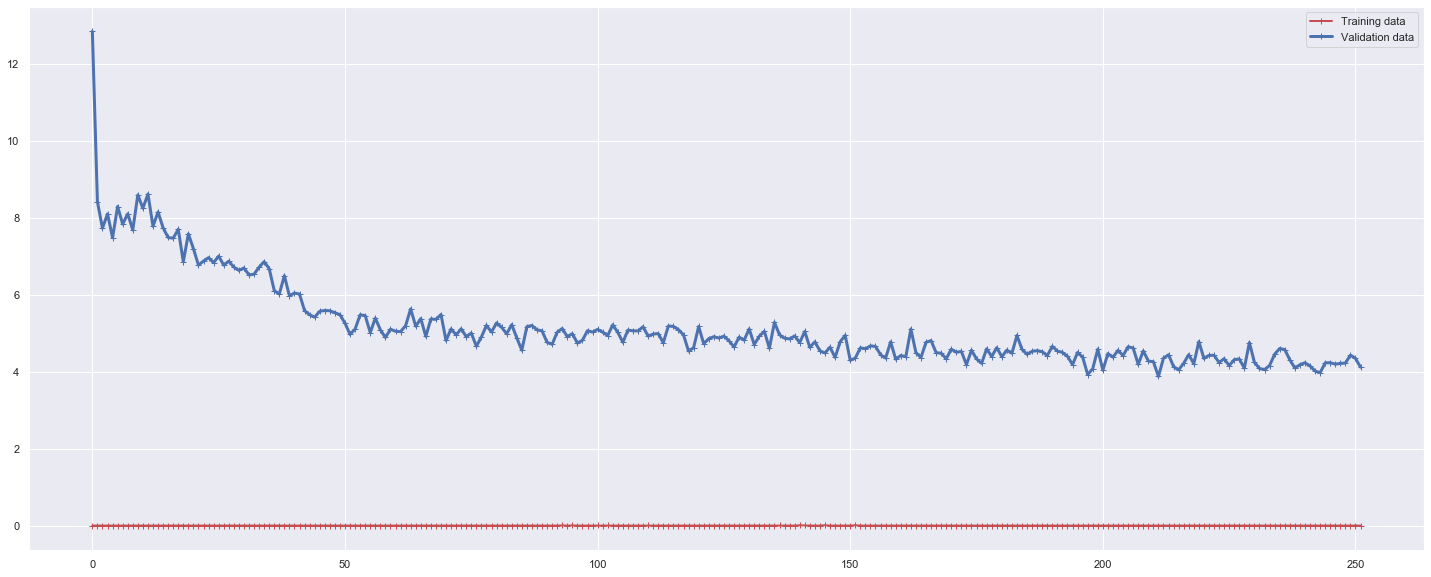

In [41]:
plot_learning_curves(final_model)

***
The graph shows high variance and low bias. We could improve this by increasing the number of instances or attempting to regularize the model more.
<br>
Overall we were # 91-93% accurate on the prices of houses in Boston. The features that were the most important was the number of rooms and the status of the area.
***